# **# CREDIT CARD FRAUD DETECTION MODEL**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("1_cleaned_credit_card_transactions.csv")

# Data Cleaning

In [3]:
df.shape

(1048575, 12)

In [4]:
df.head()

,Transaction_id,Transaction_date_time,Credit_card_number,Cardholder_fullname,Merchant,Category,Amount,Gender,State,Job,dob,Is_fraud
0,0b242abb623afc578575680df30655b9,1/1/2019 0:00,2.703190e+15,Jennifer Banks,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,North Carolina,"Psychologist, counselling",3/9/1988,0
1,1f76529f8574734946361c461b024d99,1/1/2019 0:00,6.304230e+11,Stephanie Gill,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Washington,Special educational needs teacher,6/21/1978,0
2,a1a22d70485983eac12b5b88dad1cf95,1/1/2019 0:00,3.885950e+13,Edward Sanchez,fraud_Lind-Buckridge,entertainment,220.11,M,Idaho,Nature conservation officer,1/19/1962,0
3,6b849c168bdad6f867558c3793159a81,1/1/2019 0:01,3.534090e+15,Jeremy White,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Montana,Patent attorney,1/12/1967,0
4,a41d7549acf90789359a9aa5346dcb46,1/1/2019 0:03,3.755340e+14,Tyler Garcia,fraud_Keeling-Crist,misc_pos,41.96,M,Virginia,Dance movement psychotherapist,3/28/1986,0


In [5]:
df.columns

Index(['Transaction_id', 'Transaction_date_time', 'Credit_card_number',
       'Cardholder_fullname', 'Merchant', 'Category', 'Amount', 'Gender',
       'State', 'Job', 'dob', 'Is_fraud'],
      dtype='object')

In [6]:
df.isnull().sum()

Transaction_id           0
Transaction_date_time    0
Credit_card_number       0
Cardholder_fullname      0
Merchant                 0
Category                 0
Amount                   0
Gender                   0
State                    0
Job                      0
dob                      0
Is_fraud                 0
dtype: int64

In [7]:
df.info()   # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Transaction_id         1048575 non-null  object 
 1   Transaction_date_time  1048575 non-null  object 
 2   Credit_card_number     1048575 non-null  float64
 3   Cardholder_fullname    1048575 non-null  object 
 4   Merchant               1048575 non-null  object 
 5   Category               1048575 non-null  object 
 6   Amount                 1048575 non-null  float64
 7   Gender                 1048575 non-null  object 
 8   State                  1048575 non-null  object 
 9   Job                    1048575 non-null  object 
 10  dob                    1048575 non-null  object 
 11  Is_fraud               1048575 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 96.0+ MB


In [8]:
df.describe()

,Credit_card_number,Amount,Is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171565e+17,7.027910e+01,5.727773e-03
std,1.308811e+18,1.599518e+02,7.546503e-02
min,6.041621e+10,1.000000e+00,0.000000e+00
25%,1.800400e+14,9.640000e+00,0.000000e+00
50%,3.520550e+15,4.745000e+01,0.000000e+00
75%,4.642260e+15,8.305000e+01,0.000000e+00
max,4.992350e+18,2.894890e+04,1.000000e+00


In [9]:
# Since Cardholder_fullname is Personally Identifiable Information.
df["Customer_id"] = df.groupby("Cardholder_fullname").ngroup()
df.drop(columns=["Cardholder_fullname"], inplace=True)

In [10]:
df

,Transaction_id,Transaction_date_time,Credit_card_number,Merchant,Category,Amount,Gender,State,Job,dob,Is_fraud,Customer_id
0,0b242abb623afc578575680df30655b9,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,North Carolina,"Psychologist, counselling",3/9/1988,0,409
1,1f76529f8574734946361c461b024d99,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Washington,Special educational needs teacher,6/21/1978,0,852
2,a1a22d70485983eac12b5b88dad1cf95,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,M,Idaho,Nature conservation officer,1/19/1962,0,293
3,6b849c168bdad6f867558c3793159a81,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Montana,Patent attorney,1/12/1967,0,428
4,a41d7549acf90789359a9aa5346dcb46,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,M,Virginia,Dance movement psychotherapist,3/28/1986,0,917
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,45ecd198c65e81e597db22e8d2ef7361,3/10/2020 16:07,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,F,Maryland,"Accountant, chartered certified",5/28/1943,0,343
1048571,c00ce51c6ebb7657474a77b9e0b51f34,3/10/2020 16:07,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,F,Iowa,Geochemist,6/28/1999,0,666
1048572,17c9dc8b2a6449ca2473726346e58e6c,3/10/2020 16:08,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,F,Kentucky,Engineering geologist,4/2/1952,0,871
1048573,5ca650881b48a6a38754f841c23b77ab,3/10/2020 16:08,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,F,New York,Film/video editor,6/25/1990,0,495


In [11]:
df["Transaction_date_time"] = pd.to_datetime(df["Transaction_date_time"])
df["dob"] = pd.to_datetime(df["dob"])

In [13]:
df

,Transaction_id,Transaction_date_time,Credit_card_number,Merchant,Category,Amount,Gender,State,Job,dob,Is_fraud,Customer_id,Age
0,0b242abb623afc578575680df30655b9,2019-01-01 00:00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,North Carolina,"Psychologist, counselling",1988-03-09,0,409,30
1,1f76529f8574734946361c461b024d99,2019-01-01 00:00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Washington,Special educational needs teacher,1978-06-21,0,852,40
2,a1a22d70485983eac12b5b88dad1cf95,2019-01-01 00:00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,M,Idaho,Nature conservation officer,1962-01-19,0,293,56
3,6b849c168bdad6f867558c3793159a81,2019-01-01 00:01:00,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Montana,Patent attorney,1967-01-12,0,428,52
4,a41d7549acf90789359a9aa5346dcb46,2019-01-01 00:03:00,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,M,Virginia,Dance movement psychotherapist,1986-03-28,0,917,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,45ecd198c65e81e597db22e8d2ef7361,2020-03-10 16:07:00,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,F,Maryland,"Accountant, chartered certified",1943-05-28,0,343,76
1048571,c00ce51c6ebb7657474a77b9e0b51f34,2020-03-10 16:07:00,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,F,Iowa,Geochemist,1999-06-28,0,666,20
1048572,17c9dc8b2a6449ca2473726346e58e6c,2020-03-10 16:08:00,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,F,Kentucky,Engineering geologist,1952-04-02,0,871,67
1048573,5ca650881b48a6a38754f841c23b77ab,2020-03-10 16:08:00,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,F,New York,Film/video editor,1990-06-25,0,495,29


In [14]:
# Cleaning Categorical text
df['Merchant'] = df['Merchant'].str.lower().str.strip()
df['Category'] = df['Category'].str.lower().str.strip()
df['Job'] = df['Job'].str.lower().str.strip()

# EDA Useful For Model

<Axes: xlabel='Is_fraud', ylabel='count'>

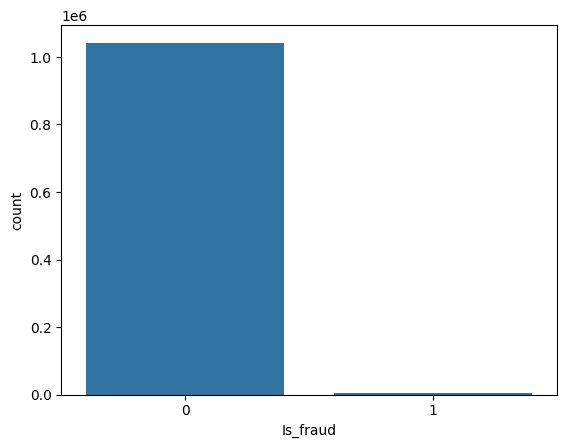

In [15]:
df['Is_fraud'].value_counts(normalize=True)   
sns.countplot(x = df['Is_fraud'])
# There is a clear imbalance in data.

<Axes: xlabel='Is_fraud', ylabel='Amount'>

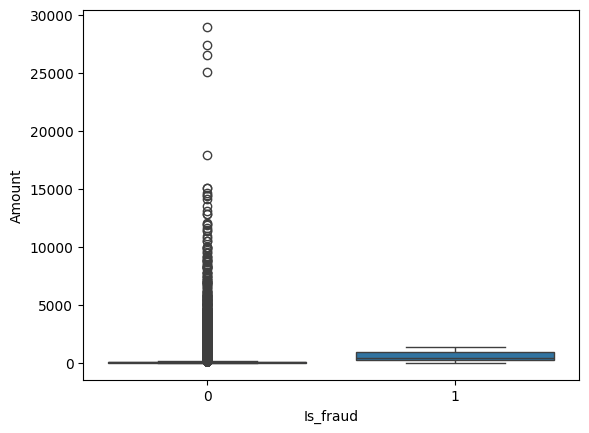

In [49]:
# Distribution of Transaction Amounts for Fraud v/s Non-fraud Cases.

sns.boxplot(x='Is_fraud', y='Amount', data=df)
# Fraud transactions tend to occur at higher amounts compared to normal transactions, although high amount alone is not sufficient to label a transaction as fraud.
# This confirms you cannot use a rule-based system. And therefore, you need ML to capture complex patterns

In [17]:
# Category Wise Fraud Rate
fraud_by_cat = df.groupby('Category')['Is_fraud'].mean()
fraud_by_cat.sort_values(ascending=False)

Category
shopping_net      0.017427
misc_net          0.014526
grocery_pos       0.013973
shopping_pos      0.007016
gas_transport     0.004679
travel            0.003046
misc_pos          0.003008
grocery_net       0.002996
entertainment     0.002435
personal_care     0.002340
kids_pets         0.002122
food_dining       0.001634
home              0.001536
health_fitness    0.001499
Name: Is_fraud, dtype: float64

In [50]:
# Merchant risk scores

merchant_risk = (
    df.groupby('Merchant')['Is_fraud']
      .mean()
      .sort_values(ascending=False)
)

merchant_risk

Merchant
fraud_herman, treutel and dickens    0.027290
fraud_kozey-boehm                    0.025116
fraud_kuhic llc                      0.021971
fraud_boyer-reichert                 0.021332
fraud_goyette inc                    0.021263
                                       ...   
fraud_mckenzie-huels                 0.000000
fraud_reichert-weissnat              0.000000
fraud_larson, quitzon and spencer    0.000000
fraud_connelly plc                   0.000000
fraud_parker, nolan and trantow      0.000000
Name: Is_fraud, Length: 693, dtype: float64

# Feature Engineering

In [12]:
# Extracting Age
df["Age"] = (df["Transaction_date_time"] - df["dob"]).dt.days // 365

In [51]:
# Extracting Useful Info from 'Transaction_date_time' column

df['date'] = df['Transaction_date_time'].dt.date
df['hour'] = df['Transaction_date_time'].dt.hour
df['day'] = df['Transaction_date_time'].dt.day
df['weekday'] = df['Transaction_date_time'].dt.weekday

<Axes: xlabel='Amount', ylabel='Count'>

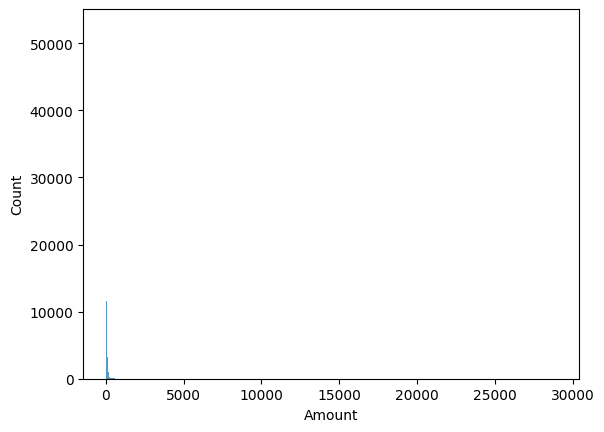

In [20]:
sns.histplot(df['Amount'])

In [21]:
category_risk = df.groupby('Category')['Is_fraud'].mean()
df['category_risk_score'] = df['Category'].map(category_risk)

In [22]:
df

,Transaction_id,Transaction_date_time,Credit_card_number,Merchant,Category,Amount,Gender,State,Job,dob,Is_fraud,Customer_id,Age,date,hour,day,weekday,category_risk_score
0,0b242abb623afc578575680df30655b9,2019-01-01 00:00:00,2.703190e+15,"fraud_rippin, kub and mann",misc_net,4.97,F,North Carolina,"psychologist, counselling",1988-03-09,0,409,30,2019-01-01,0,1,1,0.014526
1,1f76529f8574734946361c461b024d99,2019-01-01 00:00:00,6.304230e+11,"fraud_heller, gutmann and zieme",grocery_pos,107.23,F,Washington,special educational needs teacher,1978-06-21,0,852,40,2019-01-01,0,1,1,0.013973
2,a1a22d70485983eac12b5b88dad1cf95,2019-01-01 00:00:00,3.885950e+13,fraud_lind-buckridge,entertainment,220.11,M,Idaho,nature conservation officer,1962-01-19,0,293,56,2019-01-01,0,1,1,0.002435
3,6b849c168bdad6f867558c3793159a81,2019-01-01 00:01:00,3.534090e+15,"fraud_kutch, hermiston and farrell",gas_transport,45.00,M,Montana,patent attorney,1967-01-12,0,428,52,2019-01-01,0,1,1,0.004679
4,a41d7549acf90789359a9aa5346dcb46,2019-01-01 00:03:00,3.755340e+14,fraud_keeling-crist,misc_pos,41.96,M,Virginia,dance movement psychotherapist,1986-03-28,0,917,32,2019-01-01,0,1,1,0.003008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,45ecd198c65e81e597db22e8d2ef7361,2020-03-10 16:07:00,6.011980e+15,fraud_fadel inc,health_fitness,77.00,F,Maryland,"accountant, chartered certified",1943-05-28,0,343,76,2020-03-10,16,10,1,0.001499
1048571,c00ce51c6ebb7657474a77b9e0b51f34,2020-03-10 16:07:00,4.839040e+15,"fraud_cremin, hamill and reichel",misc_pos,116.94,F,Iowa,geochemist,1999-06-28,0,666,20,2020-03-10,16,10,1,0.003008
1048572,17c9dc8b2a6449ca2473726346e58e6c,2020-03-10 16:08:00,5.718440e+11,"fraud_o'connell, botsford and hand",home,21.27,F,Kentucky,engineering geologist,1952-04-02,0,871,67,2020-03-10,16,10,1,0.001536
1048573,5ca650881b48a6a38754f841c23b77ab,2020-03-10 16:08:00,4.646850e+18,fraud_thompson-gleason,health_fitness,9.52,F,New York,film/video editor,1990-06-25,0,495,29,2020-03-10,16,10,1,0.001499


In [23]:
df['merchant_txn_count'] = df.groupby('Merchant')['Transaction_id'].transform('count')
df['card_txn_count'] = df.groupby('Credit_card_number')['Transaction_id'].transform('count')
df.head()

,Transaction_id,Transaction_date_time,Credit_card_number,Merchant,Category,Amount,Gender,State,Job,dob,Is_fraud,Customer_id,Age,date,hour,day,weekday,category_risk_score,merchant_txn_count,card_txn_count
0,0b242abb623afc578575680df30655b9,2019-01-01 00:00:00,2.703190e+15,"fraud_rippin, kub and mann",misc_net,4.97,F,North Carolina,"psychologist, counselling",1988-03-09,0,409,30,2019-01-01,0,1,1,0.014526,1038,1656
1,1f76529f8574734946361c461b024d99,2019-01-01 00:00:00,6.304230e+11,"fraud_heller, gutmann and zieme",grocery_pos,107.23,F,Washington,special educational needs teacher,1978-06-21,0,852,40,2019-01-01,0,1,1,0.013973,2007,2487
2,a1a22d70485983eac12b5b88dad1cf95,2019-01-01 00:00:00,3.885950e+13,fraud_lind-buckridge,entertainment,220.11,M,Idaho,nature conservation officer,1962-01-19,0,293,56,2019-01-01,0,1,1,0.002435,1516,398
3,6b849c168bdad6f867558c3793159a81,2019-01-01 00:01:00,3.534090e+15,"fraud_kutch, hermiston and farrell",gas_transport,45.00,M,Montana,patent attorney,1967-01-12,0,428,52,2019-01-01,0,1,1,0.004679,2091,395
4,a41d7549acf90789359a9aa5346dcb46,2019-01-01 00:03:00,3.755340e+14,fraud_keeling-crist,misc_pos,41.96,M,Virginia,dance movement psychotherapist,1986-03-28,0,917,32,2019-01-01,0,1,1,0.003008,1268,1647


In [24]:
# One Hot Encoding
df_encoded = pd.get_dummies(
    df,
    columns=['Gender'],
    drop_first=True
)

In [25]:
df_encoded

,Transaction_id,Transaction_date_time,Credit_card_number,Merchant,Category,Amount,State,Job,dob,Is_fraud,Customer_id,Age,date,hour,day,weekday,category_risk_score,merchant_txn_count,card_txn_count,Gender_M
0,0b242abb623afc578575680df30655b9,2019-01-01 00:00:00,2.703190e+15,"fraud_rippin, kub and mann",misc_net,4.97,North Carolina,"psychologist, counselling",1988-03-09,0,409,30,2019-01-01,0,1,1,0.014526,1038,1656,False
1,1f76529f8574734946361c461b024d99,2019-01-01 00:00:00,6.304230e+11,"fraud_heller, gutmann and zieme",grocery_pos,107.23,Washington,special educational needs teacher,1978-06-21,0,852,40,2019-01-01,0,1,1,0.013973,2007,2487,False
2,a1a22d70485983eac12b5b88dad1cf95,2019-01-01 00:00:00,3.885950e+13,fraud_lind-buckridge,entertainment,220.11,Idaho,nature conservation officer,1962-01-19,0,293,56,2019-01-01,0,1,1,0.002435,1516,398,True
3,6b849c168bdad6f867558c3793159a81,2019-01-01 00:01:00,3.534090e+15,"fraud_kutch, hermiston and farrell",gas_transport,45.00,Montana,patent attorney,1967-01-12,0,428,52,2019-01-01,0,1,1,0.004679,2091,395,True
4,a41d7549acf90789359a9aa5346dcb46,2019-01-01 00:03:00,3.755340e+14,fraud_keeling-crist,misc_pos,41.96,Virginia,dance movement psychotherapist,1986-03-28,0,917,32,2019-01-01,0,1,1,0.003008,1268,1647,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,45ecd198c65e81e597db22e8d2ef7361,2020-03-10 16:07:00,6.011980e+15,fraud_fadel inc,health_fitness,77.00,Maryland,"accountant, chartered certified",1943-05-28,0,343,76,2020-03-10,16,10,1,0.001499,1431,429,False
1048571,c00ce51c6ebb7657474a77b9e0b51f34,2020-03-10 16:07:00,4.839040e+15,"fraud_cremin, hamill and reichel",misc_pos,116.94,Iowa,geochemist,1999-06-28,0,666,20,2020-03-10,16,10,1,0.003008,1274,798,False
1048572,17c9dc8b2a6449ca2473726346e58e6c,2020-03-10 16:08:00,5.718440e+11,"fraud_o'connell, botsford and hand",home,21.27,Kentucky,engineering geologist,1952-04-02,0,871,67,2020-03-10,16,10,1,0.001536,2021,1239,False
1048573,5ca650881b48a6a38754f841c23b77ab,2020-03-10 16:08:00,4.646850e+18,fraud_thompson-gleason,health_fitness,9.52,New York,film/video editor,1990-06-25,0,495,29,2020-03-10,16,10,1,0.001499,1348,2113,False


In [26]:
df_encoded.columns

Index(['Transaction_id', 'Transaction_date_time', 'Credit_card_number',
       'Merchant', 'Category', 'Amount', 'State', 'Job', 'dob', 'Is_fraud',
       'Customer_id', 'Age', 'date', 'hour', 'day', 'weekday',
       'category_risk_score', 'merchant_txn_count', 'card_txn_count',
       'Gender_M'],
      dtype='object')

In [27]:
z = df_encoded.drop(columns=[
      'Transaction_id',
      'Credit_card_number',
      'Customer_id',
     'Transaction_date_time',
     'Merchant',
    'State',
    'dob',
    'date',
    'Category',
     'Job'] )

z


,Amount,Is_fraud,Age,hour,day,weekday,category_risk_score,merchant_txn_count,card_txn_count,Gender_M
0,4.97,0,30,0,1,1,0.014526,1038,1656,False
1,107.23,0,40,0,1,1,0.013973,2007,2487,False
2,220.11,0,56,0,1,1,0.002435,1516,398,True
3,45.00,0,52,0,1,1,0.004679,2091,395,True
4,41.96,0,32,0,1,1,0.003008,1268,1647,True
...,...,...,...,...,...,...,...,...,...,...
1048570,77.00,0,76,16,10,1,0.001499,1431,429,False
1048571,116.94,0,20,16,10,1,0.003008,1274,798,False
1048572,21.27,0,67,16,10,1,0.001536,2021,1239,False
1048573,9.52,0,29,16,10,1,0.001499,1348,2113,False


In [28]:
z.columns

Index(['Amount', 'Is_fraud', 'Age', 'hour', 'day', 'weekday',
       'category_risk_score', 'merchant_txn_count', 'card_txn_count',
       'Gender_M'],
      dtype='object')

In [29]:
corr = z.corr()['Is_fraud'].abs().sort_values(ascending=False)
corr.head(10)
# Amount is strongest predictor. Dont drop other features. This is normal in Fraud detections.

Is_fraud               1.000000
Amount                 0.218417
category_risk_score    0.070751
card_txn_count         0.047860
hour                   0.012416
Age                    0.010723
Gender_M               0.007936
merchant_txn_count     0.007434
day                    0.005566
weekday                0.001399
Name: Is_fraud, dtype: float64

# MODEL TRAINING AND EVALUATION

In [30]:
# Train Test Split
X = z.drop(["Is_fraud"], axis =1)
y = z["Is_fraud"]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state =42, stratify = y)  
# stratify = y is mandatory for imbalanced fraud data

In [32]:
# Baseline model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter = 1000)

In [33]:
model_lr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [34]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    208514
           1       0.01      0.00      0.00      1201

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

ROC AUC: 0.8468009028831648


In [35]:
model_lr_bal = LogisticRegression(class_weight="balanced", max_iter=1000)
model_lr_bal.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [36]:
y_pred_bal = model_lr_bal.predict(X_test)
y_prob_bal = model_lr_bal.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_bal))
print("ROC AUC:", roc_auc_score(y_test, y_prob_bal))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    208514
           1       0.07      0.75      0.12      1201

    accuracy                           0.94    209715
   macro avg       0.53      0.84      0.55    209715
weighted avg       0.99      0.94      0.96    209715

ROC AUC: 0.8688617237792502


In [37]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)
model_rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [38]:
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_lr_bal.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208514
           1       0.96      0.78      0.86      1201

    accuracy                           1.00    209715
   macro avg       0.98      0.89      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC: 0.8688617237792502


In [39]:
from xgboost import XGBClassifier

In [40]:
model_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="auc",
    random_state=42
)

model_xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [42]:
y_pred_xgb = model_xgb.predict(X_test)
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    208514
           1       0.27      0.96      0.42      1201

    accuracy                           0.98    209715
   macro avg       0.64      0.97      0.71    209715
weighted avg       1.00      0.98      0.99    209715

ROC-AUC: 0.9979626141149612


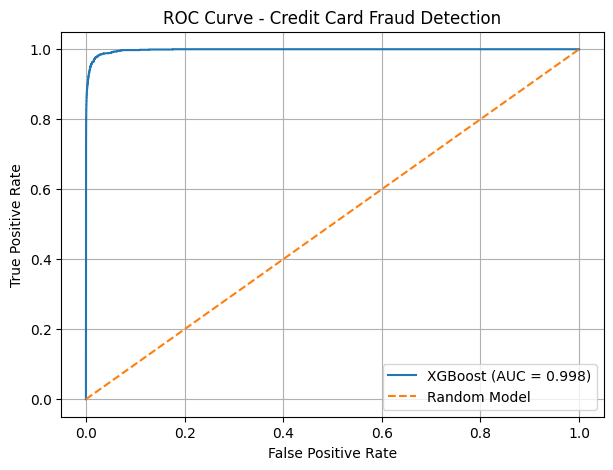

In [46]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Card Fraud Detection")
plt.legend()
plt.grid()
plt.show()


In [47]:
# Threshold Tuning 
from sklearn.metrics import precision_score, recall_score

thresholds = [0.2, 0.3, 0.4, 0.5]
results = []

for t in thresholds:
    y_pred_t = (y_prob_xgb >= t).astype(int)
    results.append({
        "threshold": t,
        "precision_fraud": precision_score(y_test, y_pred_t),
        "recall_fraud": recall_score(y_test, y_pred_t)
    })
results

[{'threshold': 0.2,
  'precision_fraud': 0.12623630756141657,
  'recall_fraud': 0.9883430474604497},
 {'threshold': 0.3,
  'precision_fraud': 0.17165697674418604,
  'recall_fraud': 0.9833472106577852},
 {'threshold': 0.4,
  'precision_fraud': 0.22215909090909092,
  'recall_fraud': 0.9766860949208993},
 {'threshold': 0.5,
  'precision_fraud': 0.2714486638537271,
  'recall_fraud': 0.9641965029142381}]

In [48]:
# Feature importance
importance = model_xgb.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

# Top 10 features
feature_importance_df.head(10)


,feature,importance
0,Amount,0.531768
2,hour,0.165285
5,category_risk_score,0.137321
6,merchant_txn_count,0.071935
7,card_txn_count,0.025500
1,Age,0.023693
8,Gender_M,0.019942
3,day,0.013922
4,weekday,0.010634
